In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 200)

In [3]:
df_churn = pd.read_csv('telecom_churn_data.csv')
df_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
df_churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [5]:
cols_to_category = ['circle_id', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_7', 'night_pck_user_8',
                   'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

for col in cols_to_category:
    df_churn[col] = df_churn[col].astype('category')


## Data Cleaning


In [6]:
def calc_null_per():
    null_per = 100 * df_churn.isnull().sum() / df_churn.shape[0]
    above_zero = null_per[null_per > 0]
    return above_zero

In [7]:
calc_null_per()

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

### Imputation

In [8]:
cols_to_impute_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
                       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 
                       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 
                       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 
                       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 
                       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 
                       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 
                       'night_pck_user_8', 'night_pck_user_9']

for col in cols_to_impute_zero:
    df_churn[col].fillna(0, inplace=True)

In [9]:
calc_null_per()

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

#### Drop high null percentage columns

In [10]:
df_churn = df_churn.drop(
    ['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 
     'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
             axis = 1)

#### Drop irreleant columns

In [11]:
df_churn = df_churn.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'],
             axis = 1)

In [12]:
null_cols = calc_null_per() 
null_cols

loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t2f_mou_6       3.937039
loc_og_t2f_mou_7       3.859039
loc_og_t2f_mou_8       5.378054
loc_og_t2f_mou_9       7.745077
loc_og_t

In [13]:
def impute_based_on_zero_per(col):
    zero_per = round(100 * (df_churn[col] == 0).sum() / df_churn.shape[0], 2)
    if zero_per > 95:
        df_churn.drop(col, axis=1, inplace=True)
        return
    if zero_per > 50:
        df_churn[col].fillna(0, inplace=True)
        return
    df_churn[col].fillna(df_churn[col].median(), inplace=True)

In [14]:
for col in null_cols.index:
    if df_churn[col].dtype == 'O':
        df_churn[col].fillna(df_churn[col].mode()[0], inplace=True)
    else:
        impute_based_on_zero_per(col)

In [15]:
calc_null_per()

Series([], dtype: float64)

## Filter High Value Customer

In [16]:
## Calc Average 

In [17]:
df_churn["total_rech_amt_6_7"] = (df_churn["total_rech_amt_6"] + df_churn["total_rech_amt_7"])/2

In [18]:
df_churn["total_rech_amt_6_7"].head(10)

0     307.0
1     229.0
2     241.5
3     270.0
4     273.0
5      60.0
6     360.5
7    1185.0
8     519.0
9     207.5
Name: total_rech_amt_6_7, dtype: float64

In [19]:
df_churn_hvc = df_churn[df_churn['total_rech_amt_6_7'] > df_churn['total_rech_amt_6_7'].quantile(0.7)]

In [20]:
df_churn_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 207 entries, mobile_number to total_rech_amt_6_7
dtypes: category(5), float64(164), int64(34), object(4)
memory usage: 46.6+ MB


## Driving Target Column

In [21]:
df_churn_hvc['total_call_usage'] = df_churn_hvc['total_og_mou_9'] + df_churn_hvc['total_ic_mou_9']

C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_churn_hvc['total_data_usage'] = df_churn_hvc['vol_2g_mb_9'] + df_churn_hvc['vol_3g_mb_9']

C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_churn_hvc.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,total_call_usage,total_data_usage
7,7000701601,109,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,...,0,0,802,57.74,19.38,18.74,0.0,1185.0,0.00,0.0
8,7001524846,109,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,...,0,0,315,21.03,910.65,122.16,0.0,519.0,177.09,0.0
13,7002191713,109,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,...,0,0,2607,0.00,0.00,0.00,0.0,380.0,1077.95,0.0
16,7000875565,109,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,...,0,0,511,0.00,2.45,21.89,0.0,459.0,590.30,0.0
17,7000187447,109,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,...,0,0,667,0.00,0.00,0.00,0.0,408.0,718.21,0.0


In [24]:
df_churn_hvc['total_usage'] = df_churn_hvc['total_call_usage'] + df_churn_hvc['total_data_usage']


C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_churn_hvc['total_usage']

7           0.00
8         177.09
13       1077.95
16        590.30
17        718.21
          ...   
99970     651.59
99974     457.12
99986    2592.97
99988     841.39
99997    4265.02
Name: total_usage, Length: 29979, dtype: float64

In [26]:
df_churn_hvc['cust_churn'] = df_churn_hvc.total_usage.map(lambda x: 'Y' if x == 0 else 'N')

C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_churn_hvc.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,total_call_usage,total_data_usage,total_usage,cust_churn
7,7000701601,109,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,...,802,57.74,19.38,18.74,0.0,1185.0,0.00,0.0,0.00,Y
8,7001524846,109,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,...,315,21.03,910.65,122.16,0.0,519.0,177.09,0.0,177.09,N
13,7002191713,109,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,...,2607,0.00,0.00,0.00,0.0,380.0,1077.95,0.0,1077.95,N
16,7000875565,109,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,...,511,0.00,2.45,21.89,0.0,459.0,590.30,0.0,590.30,N
17,7000187447,109,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,...,667,0.00,0.00,0.00,0.0,408.0,718.21,0.0,718.21,N


### Drop Highly Skewed Columns

In [28]:
cat_columns = df_churn_hvc.select_dtypes(['object', 'category']).columns
cat_columns

Index(['circle_id', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
       'cust_churn'],
      dtype='object')

In [29]:
# print value count in each column
for col in cat_columns:
    print(col + ':')
    print(round(100 * df_churn_hvc[col].value_counts(normalize=True), 2))
    print('-------------')

circle_id:
109    100.0
Name: circle_id, dtype: float64
-------------
date_of_last_rech_6:
6/30/2014    29.28
6/29/2014    18.61
6/28/2014    12.39
6/27/2014    10.81
6/26/2014     6.13
6/25/2014     4.38
6/24/2014     3.59
6/23/2014     2.36
6/21/2014     1.95
6/22/2014     1.73
6/14/2014     1.56
6/20/2014     1.18
6/19/2014     1.17
6/17/2014     1.16
6/18/2014     1.00
6/16/2014     0.57
6/12/2014     0.43
6/13/2014     0.39
6/15/2014     0.39
6/11/2014     0.24
6/8/2014      0.14
6/7/2014      0.11
6/10/2014     0.10
6/5/2014      0.07
6/9/2014      0.06
6/3/2014      0.06
6/4/2014      0.05
6/2/2014      0.04
6/1/2014      0.04
6/6/2014      0.03
Name: date_of_last_rech_6, dtype: float64
-------------
date_of_last_rech_7:
7/31/2014    26.80
7/30/2014    17.85
7/29/2014    11.58
7/28/2014     9.54
7/25/2014     7.05
7/27/2014     5.80
7/26/2014     5.53
7/24/2014     2.89
7/22/2014     2.03
7/23/2014     1.88
7/16/2014     1.33
7/21/2014     1.24
7/20/2014     1.20
7/15/2014     1

In [30]:
# drop circle_id
df_churn_hvc = df_churn_hvc.drop(['circle_id', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_6',
                                 'night_pck_user_8', 'night_pck_user_9'], axis=1)

## Outlier Treatment

In [31]:
shape_df = pd.DataFrame({'skew': df_churn_hvc.skew(), 'kurt': df_churn_hvc.kurt()})
shape_df.head

<bound method NDFrame.head of                          skew         kurt
mobile_number       -0.025704    -1.166016
arpu_6              13.344432   579.532168
arpu_7              19.344429  1151.062480
arpu_8              16.086110   818.524756
arpu_9              19.663747  1260.577401
...                       ...          ...
sep_vbc_3g          18.305443   564.984735
total_rech_amt_6_7  21.226967  1263.635020
total_call_usage     2.291312    10.416770
total_data_usage     9.072752   188.985494
total_usage          4.561535    62.771213

[201 rows x 2 columns]>

In [32]:
shape_df[(shape_df['skew'].abs() > 15 ) & (shape_df['kurt'].abs() > 100)]

,skew,kurt
arpu_7,19.344429,1151.062480
arpu_8,16.086110,818.524756
arpu_9,19.663747,1260.577401
roam_ic_mou_7,16.889585,497.892089
roam_ic_mou_8,18.421106,617.823852
roam_ic_mou_9,17.172127,490.498438
loc_og_t2f_mou_6,16.900925,704.976110
loc_og_t2f_mou_7,15.477118,535.713766
loc_og_t2c_mou_6,17.784396,598.331584
loc_og_t2c_mou_7,25.213176,1076.167488


In [33]:
outlier_df = shape_df[(shape_df['skew'].abs() > 15 ) & (shape_df['kurt'].abs() > 100)]
for col in outlier_df.index:
    skew = shape_df.loc[col]['skew']
    if skew > 0:
        val = df_churn_hvc[col].quantile(0.999)
        df_churn_hvc[col] = np.where(df_churn_hvc[col] > val, val ,df_churn_hvc[col])
    else:
        val = df_churn_hvc[col].quantile(0.001)
        df_churn_hvc[col] = np.where(df_churn_hvc[col] < val, val ,df_churn_hvc[col])

## EDA

In [34]:
df_churn_hvc.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 206 columns):
mobile_number          29979 non-null int64
arpu_6                 29979 non-null float64
arpu_7                 29979 non-null float64
arpu_8                 29979 non-null float64
arpu_9                 29979 non-null float64
onnet_mou_6            29979 non-null float64
onnet_mou_7            29979 non-null float64
onnet_mou_8            29979 non-null float64
onnet_mou_9            29979 non-null float64
offnet_mou_6           29979 non-null float64
offnet_mou_7           29979 non-null float64
offnet_mou_8           29979 non-null float64
offnet_mou_9           29979 non-null float64
roam_ic_mou_6          29979 non-null float64
roam_ic_mou_7          29979 non-null float64
roam_ic_mou_8          29979 non-null float64
roam_ic_mou_9          29979 non-null float64
roam_og_mou_6          29979 non-null float64
roam_og_mou_7          29979 non-null float64
roam_og_mou_8     

In [35]:
df_churn_hvc.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,total_call_usage,total_data_usage,total_usage
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,7.001223e+09,587.587624,585.997508,531.290249,485.122964,296.597992,304.918683,268.821645,242.620956,419.142919,...,0.128890,1264.158911,129.482436,135.225368,121.450911,6.196224,693.027823,840.580894,333.955764,1174.536658
std,6.846594e+05,442.848876,378.029730,407.344474,406.012651,460.722063,481.771118,466.202921,442.149687,469.973639,...,0.757993,975.181038,390.625027,408.218570,389.910814,39.986160,388.521808,808.682928,937.888180,1232.899316
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,369.000000,0.000000,0.000000,0.000000
25%,7.000641e+09,364.352500,365.235000,289.782000,239.315500,41.170000,41.045000,32.360000,29.060000,137.340000,...,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,290.070000,0.000000,425.830000
50%,7.001232e+09,495.951000,493.781000,452.232000,413.331000,125.890000,125.560000,99.590000,82.960000,282.260000,...,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,569.000000,667.500000,0.000000,893.470000
75%,7.001814e+09,704.184500,700.986000,671.349500,635.834000,353.500000,360.360000,298.215000,260.990000,523.625000,...,0.000000,1923.500000,1.600000,2.025000,0.000000,0.000000,796.000000,1150.325000,240.995000,1564.350000
max,7.002411e+09,27731.088000,4115.855306,4025.157656,3835.502988,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,...,12.000000,4321.000000,12916.220000,9165.600000,11166.210000,648.025680,4281.704000,11444.620000,39221.270000,39227.890000


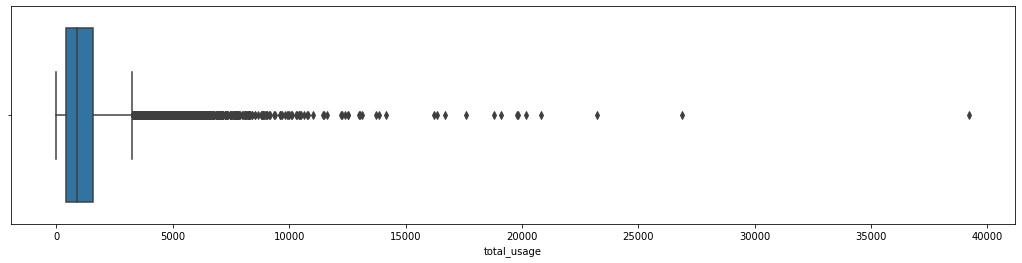

In [36]:
plt.figure(figsize=(18,4))
sns.boxplot(df_churn_hvc['total_usage'])
plt.show()

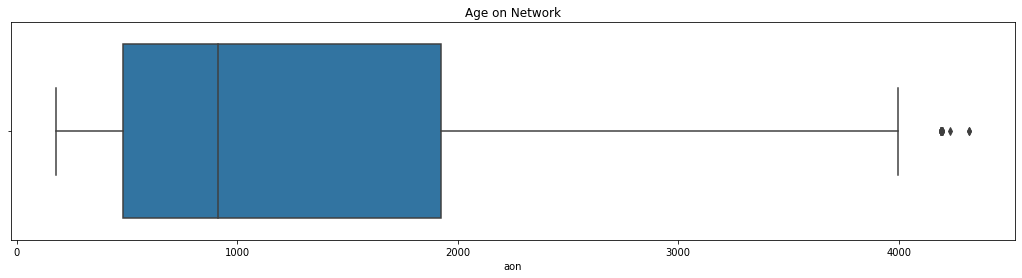

In [37]:
plt.figure(figsize=(18,4))
sns.boxplot(df_churn_hvc['aon'])
plt.title('Age on Network')
plt.show()

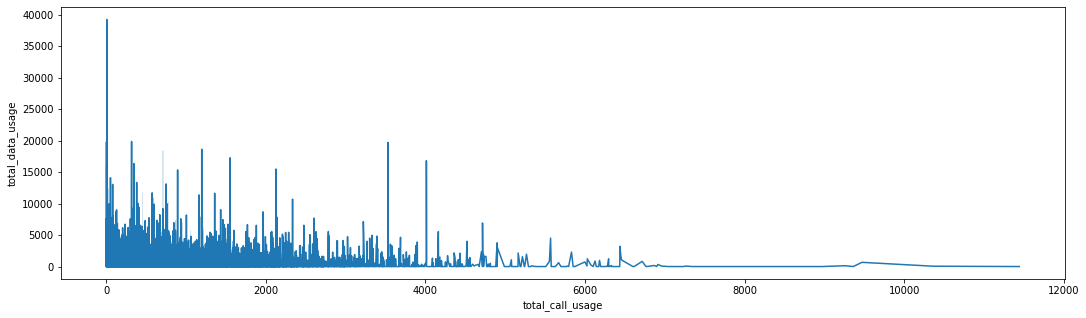

In [38]:
plt.figure(figsize=(18, 5))
sns.lineplot(x='total_call_usage', y='total_data_usage', data=df_churn_hvc)
plt.show()

In [39]:
mobile_df = df_churn_hvc.pop('mobile_number')

## Train Test Split

In [40]:
y = df_churn_hvc.pop('cust_churn')
X = df_churn_hvc

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
X_train.shape

(22484, 204)

In [43]:
X_test.shape

(7495, 204)

In [44]:
y_train.shape

(22484,)

In [45]:
y_test.shape

(7495,)

## Correlation

In [47]:
corr = X_train.corr()
corr

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,total_call_usage,total_data_usage,total_usage
arpu_6,1.000000,0.537711,0.452923,0.415782,0.314878,0.164047,0.132981,0.128674,0.481889,0.267303,...,0.022966,-0.008484,0.132316,0.134055,0.184623,0.071842,0.807906,0.216630,0.149682,0.255880
arpu_7,0.537711,1.000000,0.660009,0.552571,0.180685,0.334885,0.270116,0.219388,0.300874,0.493595,...,0.043126,-0.014679,0.174128,0.202694,0.141479,0.092007,0.856883,0.341706,0.204266,0.379118
arpu_8,0.452923,0.660009,1.000000,0.721463,0.114509,0.231563,0.385769,0.304510,0.219870,0.351103,...,0.068910,0.043878,0.230791,0.166940,0.153942,0.117385,0.646442,0.492185,0.247797,0.510349
arpu_9,0.415782,0.552571,0.721463,1.000000,0.090376,0.163618,0.276665,0.397053,0.204860,0.276994,...,0.098615,0.080258,0.199566,0.160324,0.151118,0.188552,0.554367,0.661024,0.321507,0.676728
onnet_mou_6,0.314878,0.180685,0.114509,0.090376,1.000000,0.728516,0.590450,0.530489,0.011520,-0.047909,...,-0.039862,-0.090133,-0.082857,-0.091239,-0.082961,-0.037042,0.299358,0.243246,-0.090865,0.088061
onnet_mou_7,0.164047,0.334885,0.231563,0.163618,0.728516,1.000000,0.795576,0.657017,-0.028737,0.005142,...,-0.035632,-0.095078,-0.078585,-0.086621,-0.087905,-0.035788,0.300147,0.334279,-0.083719,0.152684
onnet_mou_8,0.132981,0.270116,0.385769,0.276665,0.590450,0.795576,1.000000,0.800159,-0.010885,0.016264,...,-0.026628,-0.063529,-0.057583,-0.070246,-0.063968,-0.028439,0.249567,0.463035,-0.062377,0.252732
onnet_mou_9,0.128674,0.219388,0.304510,0.397053,0.530489,0.657017,0.800159,1.000000,0.009614,0.022028,...,-0.019254,-0.044017,-0.059001,-0.071617,-0.063732,-0.020682,0.214660,0.626501,-0.053084,0.366051
offnet_mou_6,0.481889,0.300874,0.219870,0.204860,0.011520,-0.028737,-0.010885,0.009614,1.000000,0.696267,...,-0.036216,-0.051432,-0.064161,-0.068532,-0.057103,-0.013373,0.463446,0.294981,-0.068450,0.138910
offnet_mou_7,0.267303,0.493595,0.351103,0.276994,-0.047909,0.005142,0.016264,0.022028,0.696267,1.000000,...,-0.036829,-0.063281,-0.067346,-0.071909,-0.070993,-0.016286,0.449759,0.377265,-0.065962,0.194267


In [66]:
threshold = 0.8
corr_matrix = corr
iters = range(len(corr_matrix.columns) - 1)
col1_list = []
col2_list = []
val_list = []

# Iterate through the correlation matrix and compare correlations
for i in iters:
    for j in range(i+1):
        item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns
        row = item.index
        val = abs(item.values)
        
        # If correlation exceeds the threshold
        if val[0][0] >= threshold:
            col1 = col.values[0]
            col2 = row.values[0]
            if ((col2 not in col1_list) or (col1 not in col2_list)):
                col1_list.append(col1)
                col2_list.append(col2)
                val_list.append(val[0][0])

pd.DataFrame({'col1': col1_list, 'col2': col2_list, 'val': val_list})

,col1,col2,val
0,onnet_mou_9,onnet_mou_8,0.800159
1,loc_og_t2t_mou_8,loc_og_t2t_mou_7,0.822329
2,loc_og_t2t_mou_9,loc_og_t2t_mou_8,0.849863
3,loc_og_t2m_mou_8,loc_og_t2m_mou_7,0.812479
4,loc_og_t2m_mou_9,loc_og_t2m_mou_8,0.825148
5,loc_og_t2f_mou_9,loc_og_t2f_mou_8,0.806843
6,loc_og_mou_8,loc_og_mou_7,0.826398
7,loc_og_mou_9,loc_og_mou_8,0.847715
8,std_og_t2t_mou_6,onnet_mou_6,0.851038
9,std_og_t2t_mou_7,onnet_mou_7,0.852824
